<a href="https://colab.research.google.com/github/murali-marimekala/tensorflow_deeplearning_bootcamp/blob/main/4_Neural_Network_Classification_with_Tensorflow/2_Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with larger examples (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification **.

* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, its multi-class classification

In [1]:
# To practice multi-class classificaiton , we are going to build a neural network to classify images of different items of clothing.

import tensorflow as tfs
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}")
print(f"Training label:\n{train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [3]:
# Check the shape of single example
train_data[0].shape , train_labels[0].shape

((28, 28), ())

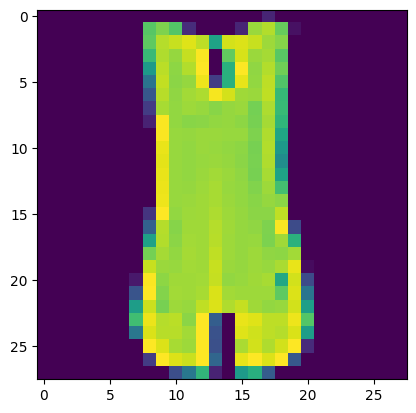

In [4]:
#Plot a singlesample
import matplotlib.pyplot as plt
plt.imshow(train_data[4])



In [5]:
# Check out sample label : Refer https://www.tensorflow.org/tutorials/keras/classification
train_labels[4]

0

In [6]:
# create a small list so that we acn index into our training labels so they are human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Dress')

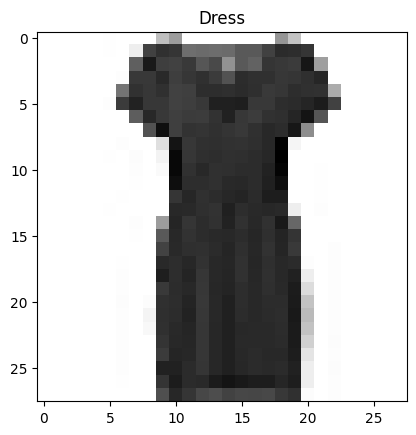

In [7]:
#Plot an example image and its labels
index_of_choice = 20
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

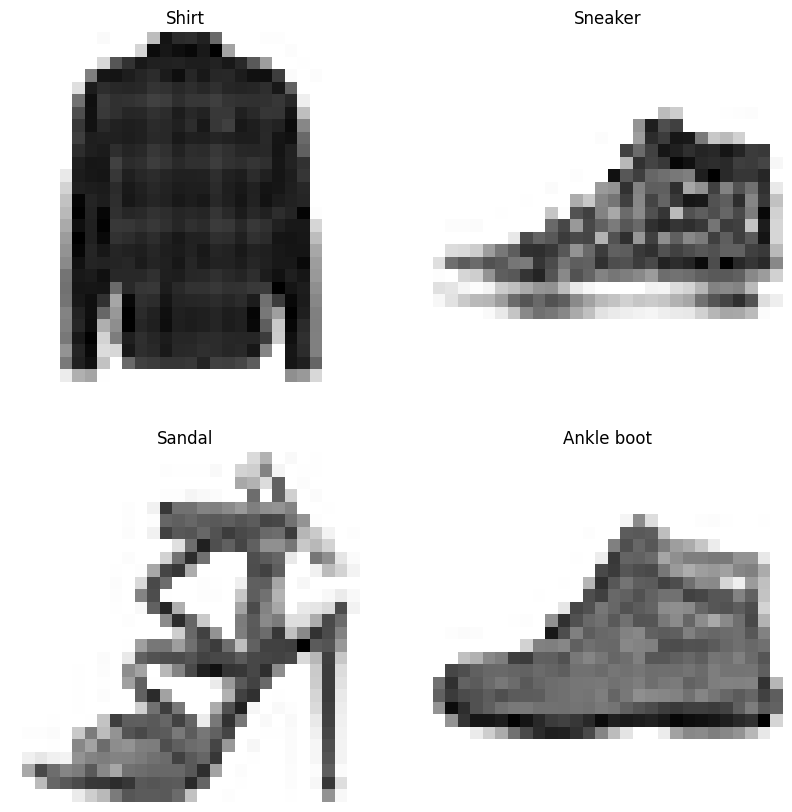

In [8]:
#Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(10,10))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis("off")

## Building a Multiclassification Model
Four our multi-class classificaiton model, we can use a similar architecture to our binary classifier, however we use a similar architecture to our things

* input shape = 28 x 28 (the shape of input image)
* output layer shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
* Output layear activation = Softmax(not sigmoid)
* If your labels are one-hot encoded, use categorical entropy.
* If your labels are integer form use Sparse Categorical entropy

In [9]:
train_data[0].shape

(28, 28)

In [10]:
#Our data need to be flatted from 28x28 to (None, 784)
import tensorflow as tf

flattern_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28))
])

flattern_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [12]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [13]:

#Multiclass classification model

# Set random seed
tf.random.set_seed(42)

#Create a model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),   #Input shape
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation= tf.keras.activations.softmax)  #Output shape
])

# Compile the model
model_11.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs = 10,
                                validation_data = (test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.1581 - loss: 3.7239 - val_accuracy: 0.2247 - val_loss: 1.8026
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2568 - loss: 1.7580 - val_accuracy: 0.3169 - val_loss: 1.6570
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.3146 - loss: 1.6506 - val_accuracy: 0.3585 - val_loss: 1.5386
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3487 - loss: 1.5678 - val_accuracy: 0.3642 - val_loss: 1.6439
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3605 - loss: 1.5171 - val_accuracy: 0.3914 - val_loss: 1.4540
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3905 - loss: 1.4641 - val_accuracy: 0.4429 - val_loss: 1.3703
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4309 - loss: 1.3636 - val_accuracy: 0.4497 - val_loss: 1.2849
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4529 - loss: 1.2711

In [14]:
100/10

10.0

In [15]:
#Check the model summary
model_11.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [16]:
# Check min and max values of training data
train_data.min(), train_data.max()

(0, 255)

# Neural Networks prefer data to be scaled (or normalized), this means they like ot have numbers in the tensors they like to be between 0 and 1.

In [17]:
# We can get out training and testing data between 0 and 1 by dividing by the maximum. This is  referred to as scaling or normalization

train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

#Check min and max values of scaled traiing data
train_data_norm.min(), train_data_norm.max()

#Display train and test norm data
train_data_norm[0]
test_data_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [18]:
#Now our data is normalized lets build a model to find pattern in it
tf.random.set_seed(42)

# Create a model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
    ])

#Compile the model
model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm,test_labels))



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4383 - loss: 1.5163 - val_accuracy: 0.7361 - val_loss: 0.7980
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7414 - loss: 0.7535 - val_accuracy: 0.7538 - val_loss: 0.7189
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7525 - loss: 0.6915 - val_accuracy: 0.7594 - val_loss: 0.6878
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7564 - loss: 0.6644 - val_accuracy: 0.7633 - val_loss: 0.6731
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7631 - loss: 0.6484 - val_accuracy: 0.7670 - val_loss: 0.6636
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7667 - loss: 0.6373 - val_accuracy: 0.7663 - val_loss: 0.6558
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7692 - loss: 0.6283 - val_accuracy: 0.7688 - val_loss: 0.6476
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7729 - loss: 0.6160 - 

** Note ** Nueral network tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 and 1)

<Axes: title={'center': 'Normalized data'}>

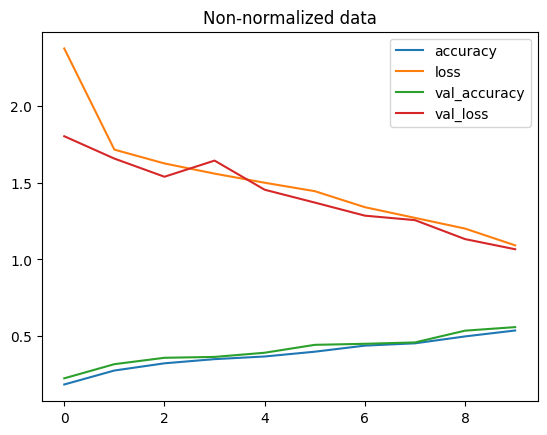

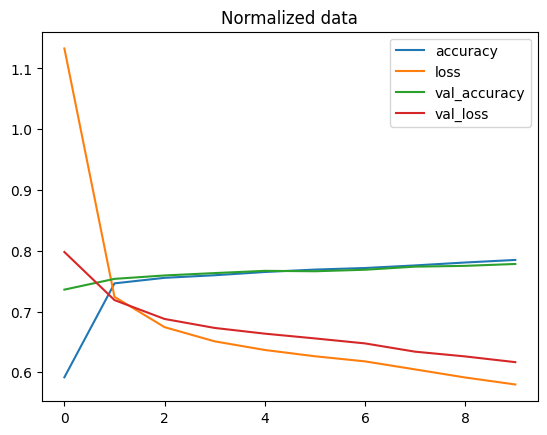

In [21]:
import pandas as pd
#Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")

#Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

> When Comparing the results, same models with even slightly different data can produce dramatically different results. When you are comparing models its important to make sure you are comparing them on the same criteria. (e.g. same architecture but different data or same data but diferent architecture).

## Finding the ideal learning rate

In [28]:
#Set the random seed

tf.random.set_seed(42)

#Create the mdoel
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

#Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#Create the learning rate call back
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

#Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])



Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4675 - loss: 1.4214 - val_accuracy: 0.7467 - val_loss: 0.7896 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7690 - loss: 0.7320 - val_accuracy: 0.7927 - val_loss: 0.6419 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7991 - loss: 0.6127 - val_accuracy: 0.8016 - val_loss: 0.5855 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8080 - loss: 0.5666 - val_accuracy: 0.8073 - val_loss: 0.5632 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8131 - loss: 0.5458 - val_accuracy: 0.8102 - val_loss: 0.5513 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8149 - loss: 0.5342 - val_accuracy: 0.8133 - val_loss: 0.5450 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8171 - 

Text(0.5, 1.0, 'Finding the ideal learning rate')

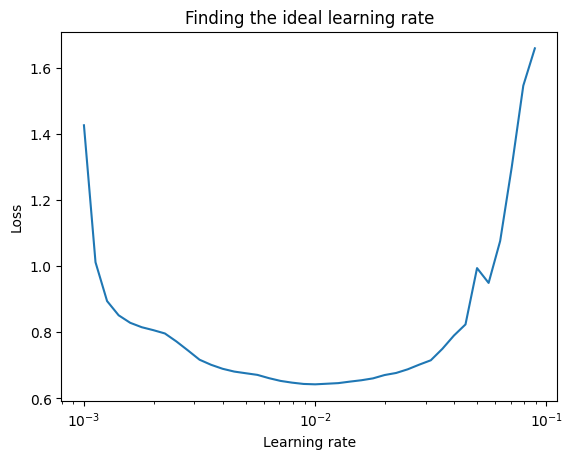

In [25]:
#Plot learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [27]:
#Lets refit the model with ideal learning rate

#Set random seed
tf.random.set_seed(42)

#Create a model
model_14 =  tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

#Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics = ["accuracy"])

#Fit the model
ideal_lr_history = model_14.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm, test_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4174 - loss: 1.6607 - val_accuracy: 0.6298 - val_loss: 0.9629
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6466 - loss: 0.9017 - val_accuracy: 0.7041 - val_loss: 0.7731
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7184 - loss: 0.7383 - val_accuracy: 0.7108 - val_loss: 0.7146
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7251 - loss: 0.6908 - val_accuracy: 0.7157 - val_loss: 0.6912
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7279 - loss: 0.6705 - val_accuracy: 0.7184 - val_loss: 0.6783
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7307 - loss: 0.6580 - val_accuracy: 0.7207 - val_loss: 0.6694
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7335 - loss: 0.6491 - val_accuracy: 0.7246 - val_loss: 0.6629
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7376 - loss: 0.6406 -